In [1]:
import pandas as pd
df = pd.read_csv('routes.csv',header = None)
df

,0,1,2,3,4,5
0,Node,Time,Destination,NextHop,Interface,Distance
1,Node,Time,Destination,NextHop,Interface,Distance
2,Node,Time,Destination,NextHop,Interface,Distance
3,Node,Time,Destination,NextHop,Interface,Distance
4,Node,Time,Destination,NextHop,Interface,Distance
...,...,...,...,...,...,...
16613,Node,Time,Destination,NextHop,Interface,Distance
16614,Node: 30,Time: +50s,Local time: +50s,Ipv4StaticRouting table,NaN,NaN
16615,Destination Gateway Genmask ...,NaN,NaN,NaN,NaN,NaN
16616,127.0.0.0 0.0.0.0 255.0.0.0 ...,NaN,NaN,NaN,NaN,NaN


In [2]:
mylist = []
for i in range(3,51,1):
    mylist.append(df[(df[1] == '+{}s'.format(i)) & (df[5] == '1')])
print(len(mylist))
print(mylist[-1])

48
        0     1          2          3  4  5
16324   2  +50s  10.1.0.18  10.1.0.18  1  1
16329   3  +50s   10.1.0.7   10.1.0.7  1  1
16333   3  +50s  10.1.0.11  10.1.0.11  1  1
16334   3  +50s  10.1.0.12  10.1.0.12  1  1
16335   3  +50s  10.1.0.13  10.1.0.13  1  1
...    ..   ...        ...        ... .. ..
16592  27  +50s  10.2.0.10  10.2.0.10  1  1
16595  28  +50s   10.2.0.2   10.2.0.2  1  1
16604  29  +50s   10.2.0.1   10.2.0.1  1  1
16607  29  +50s   10.2.0.4   10.2.0.4  1  1
16611  29  +50s   10.2.0.8   10.2.0.8  1  1

[98 rows x 6 columns]


In [ ]:
end = []
for j in range(len(mylist)):
    res = []
    temp = mylist[j]
    point = 0
    for i in range(len(mylist[j])):
        tmp = []
        if point== len(temp):
            res.append(tmp)
            break
        node = int(temp.iloc[point][0])
        while node==i :
            desnode = int(temp.iloc[point][2][7:])-1
            tmp.append(desnode)
            point = point+1
            if point==len(temp):
                break
            node = int(temp.iloc[point][0])
        res.append(tmp)
    end.append(res)
end

In [5]:
from numpy import *
result = []
for j in range(48):
    smp = end[j]
    aroundsides = []
    aroundnodes = []
    aroundside = 0
    oneres = []
    finaloneans = 0
    for i in range(50):
        #print("===========")
        for point in range(len(smp[i])):
            secondpoint = smp[i][point]
            aroundside = aroundside + len(set(smp[i]) & set(smp[secondpoint]))
           # print(smp[i])
           # print(smp[point])
           # print(aroundside)
        #print(aroundside)
        #print(len(smp[i]))
        aroundnodes.append(len(smp[i]))
        aroundsides.append(aroundside)
        aroundside = 0
    for k in range(50):
        if aroundnodes[k] == 1 or aroundnodes[k] == 0 :
            oneres.append(0)
        else:
            oneres.append(aroundsides[k]/(aroundnodes[k]*(aroundnodes[k]-1)))
    finaloneans = mean(oneres)
    result.append(finaloneans)


IndexError: list index out of range

In [14]:
result

[0.5438730158730158,
 0.5422936507936508,
 0.5670959595959596,
 0.5692503607503608,
 0.5492619047619047,
 0.5483347763347762,
 0.5341789321789322,
 0.5147936507936509,
 0.4971356421356422,
 0.5589191919191919,
 0.5459206349206349,
 0.3968888888888889,
 0.3982857142857143,
 0.4084444444444445,
 0.41823809523809524,
 0.5178412698412699,
 0.4960317460317461,
 0.5679523809523809,
 0.5191666666666667,
 0.4561904761904762,
 0.47752380952380946,
 0.36733333333333335,
 0.37200000000000005,
 0.44133333333333336,
 0.3993333333333333,
 0.3306666666666666,
 0.28733333333333333,
 0.30999999999999994,
 0.309,
 0.26466666666666666,
 0.29333333333333333,
 0.3453333333333333,
 0.312,
 0.348,
 0.306,
 0.3087619047619047,
 0.28409523809523807,
 0.24895238095238093,
 0.23847619047619048,
 0.3183333333333333,
 0.30466666666666664,
 0.3193333333333333,
 0.30752380952380953,
 0.3039047619047619,
 0.2785714285714286,
 0.26695238095238094,
 0.2833333333333334,
 0.27466666666666667]

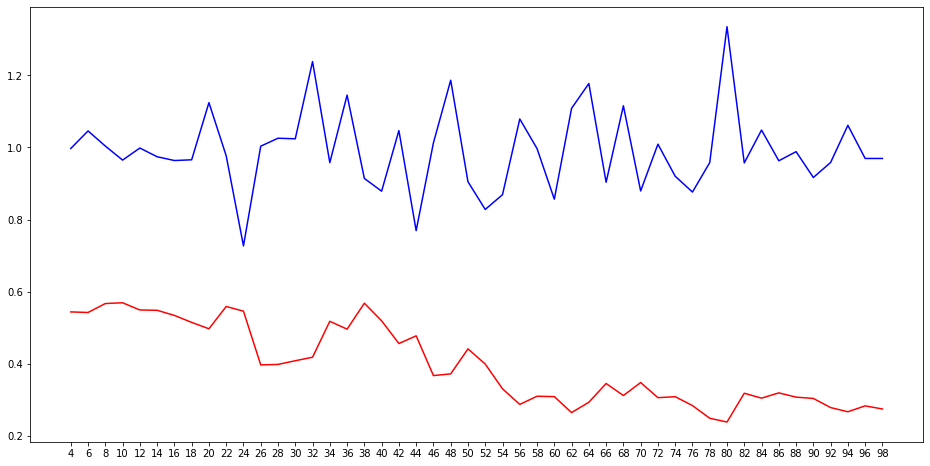

In [15]:
import matplotlib.pyplot as plt
x_time = []
for i in range(48):
    x_time.append(str(i*2+4)+'')
plt.figure(figsize=(16,8))
plt.plot(x_time, result, color='red', label = 'avggather')
cmp = []
for i in range(47):
    cmp.append(result[i+1]/result[i])
cmp.append(cmp[46])
plt.plot(x_time,cmp,  color = 'blue', label = 'compare')
plt.show() 